In [ ]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



### Getting dataset (FashionMNIST)

In [ ]:
train_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)



100%|██████████| 26.4M/26.4M [00:03<00:00, 8.49MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.11MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.4MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image ,labels = train_data[0]

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
train_data[0][1]

9

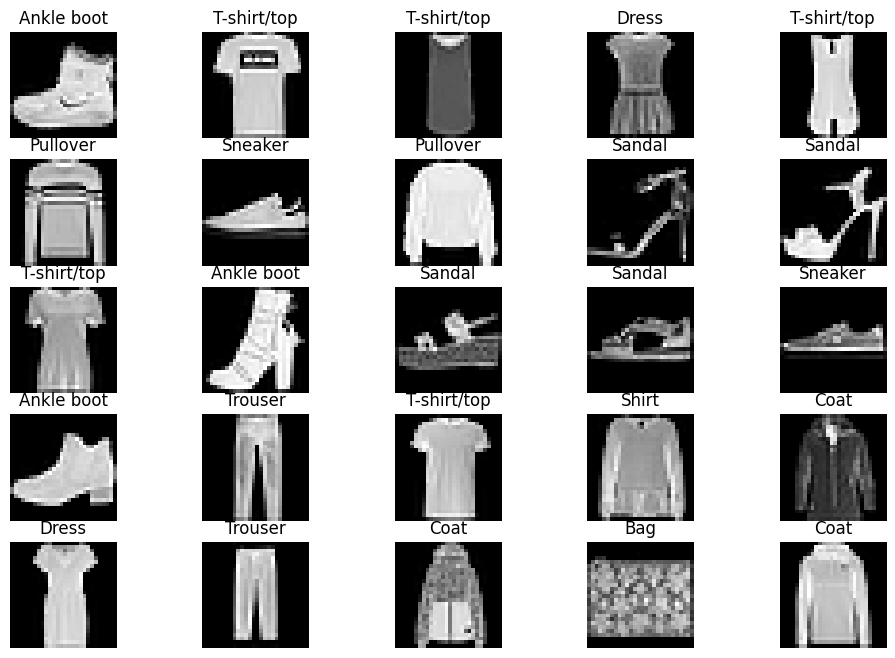

In [ ]:
image,label = train_data[0]
fig = plt.figure(figsize=(12,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_data[i][0].squeeze(),cmap='grey')
  plt.title(class_names[train_data[i][1]])
  plt.axis('off')

In [ ]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Preparing Dataloaders

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = batch_size,
    shuffle = True)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle = False)

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7b88bd5d3f90>,
 <torch.utils.data.dataloader.DataLoader at 0x7b88bf826950>)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))

In [ ]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

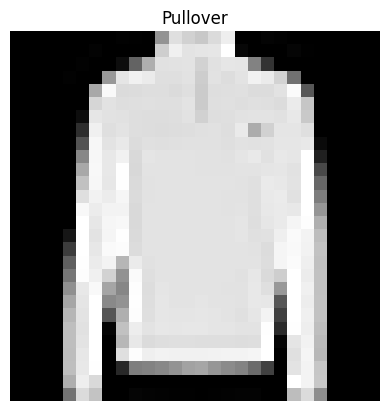

In [ ]:
torch_random_see = 42
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")


In [ ]:
random_idx

26

### Baseline Model
* simplest model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

x.shape   # (color_channel,height,width)

output = flatten_model(x)  #(color_channel,height*width)

output.shape,x.shape

(torch.Size([1, 784]), torch.Size([1, 28, 28]))

In [ ]:
from torch import nn

class fashionmnistmodel(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

In [ ]:
torch.manual_seed(42)

model = fashionmnistmodel(input_shape=28*28,
                          hidden_units = 10,
                          output_shape = len(class_names)).to('cpu')

model

fashionmnistmodel(
  (linear_layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
sample_x = torch.randn([1, 1, 28, 28])
model(sample_x).shape

torch.Size([1, 10])

In [ ]:
model.state_dict()

OrderedDict([('linear_layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, 

#### Loss function, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists')
else:
  print('Downloading helper_functions.py')
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(requests.content)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

In [ ]:
# Timing the model
from  timeit import default_timer as timer

def print_time(start:float,
               end:float,
               device:torch.device=None):
  total_time = end - start
  print(f'Train time on {device} : {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_time(start=start_time, end=end_time, device="cpu")

Train time on cpu : 0.000 seconds


5.041299999675175e-05

#### Training model

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')

  train_loss = 0


  for batch, (x,y) in enumerate(train_data_loader):

      model.train()

      y_pred = model(x)

      loss = loss_fn(y_pred,y)
      train_loss += loss

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

      if batch % 300 == 0:
        print(f' Looking at {batch*len(x)/len(train_data_loader.dataset)} samples')

  train_loss /= len(train_data_loader)

  test_loss,test_acc =  0,0
  model.eval()
  with torch.inference_mode():
    for x_test ,y_test in test_data_loader:
      test_pred = model(x_test)

      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true=y_test,
                                y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_data)

    test_acc /= len(test_data_loader)

  print(f'Train loss : {train_loss:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f}')

train_time_end_cpu = timer()

total_train_time = print_time(start = train_time_start_cpu,
                              end = train_time_end_cpu,
                              device = str(next(model.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
 Looking at 0.0 samples
 Looking at 0.16 samples
 Looking at 0.32 samples
 Looking at 0.48 samples
 Looking at 0.64 samples
 Looking at 0.8 samples
 Looking at 0.96 samples
Train loss : 0.5904 | Test loss : 0.0159 | Test acc : 82.0387
Epoch: 1
-----
 Looking at 0.0 samples
 Looking at 0.16 samples
 Looking at 0.32 samples
 Looking at 0.48 samples
 Looking at 0.64 samples
 Looking at 0.8 samples
 Looking at 0.96 samples
Train loss : 0.4763 | Test loss : 0.0150 | Test acc : 83.1969
Epoch: 2
-----
 Looking at 0.0 samples
 Looking at 0.16 samples
 Looking at 0.32 samples
 Looking at 0.48 samples
 Looking at 0.64 samples
 Looking at 0.8 samples
 Looking at 0.96 samples
Train loss : 0.4550 | Test loss : 0.0149 | Test acc : 83.4265
Train time on cpu : 34.139 seconds


#### Predictions and results

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss ,acc = 0,0
  model.eval()

  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y = x.to(device),y.to(device)

      model.to(device)
      y_pred = model(x)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)


  return {'model_name':model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc' : acc}

In [ ]:
model_results = eval_model(model = model,
                           data_loader  = test_data_loader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionmnistmodel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
!nvidia-smi

Fri Feb 14 11:09:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P0             29W /   70W |     150MiB /  15360MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Building non-linear model

In [ ]:
class fashionmnistmodel_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:

model_1 = fashionmnistmodel_1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.train()

  for batch, (x,y) in enumerate(data_loader):
    x,y = x.to(device), y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device,
              ):
  test_loss, test_acc = 0, 0
  model.to(device)  # Ensure model is on the correct device
  model.eval()

  with torch.inference_mode():
    for x, y in data_loader:
      x, y = x.to(device), y.to(device)  # Move data to the correct device
      test_pred = model(x)

      test_loss += loss_fn(test_pred, y)
      # Move the predicted labels to the same device as y_true before comparing
      test_acc += accuracy_fn(y_true=y,
                         y_pred=test_pred.argmax(dim=1).to(device))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  train_step(model= model_1,
               data_loader = train_data_loader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device  = device)

  test_step(data_loader=test_data_loader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )

  train_time_end_gpu = timer()

  total_train_time_model_1 = print_time(start=train_time_start_gpu,
                                            end=train_time_end_gpu,
                                            device=device )


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.11456 | Train accuracy: 58.46%
Test loss: 0.96320 | Test accuracy: 63.41%

Train time on cuda : 12.397 seconds
Epoch: 1
-----
Train loss: 0.90905 | Train accuracy: 64.87%
Test loss: 0.74544 | Test accuracy: 72.61%

Train time on cuda : 23.253 seconds
Epoch: 2
-----
Train loss: 0.59508 | Train accuracy: 78.25%
Test loss: 0.49708 | Test accuracy: 82.77%

Train time on cuda : 35.247 seconds


In [ ]:
# results

mode_1_results = eval_model(model = model_1,
                           data_loader  = test_data_loader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn,
                            device = device)
mode_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionmnistmodel_1',
 'model_loss': 0.49707889556884766,
 'model_acc': 82.76757188498402}

In [ ]:
model_results

{'model_name': 'fashionmnistmodel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
# Model with cnn like vgg

class fashionmnistmodel_cnn(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape : int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     )
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units*2,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units*2,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)
model_cnn =fashionmnistmodel_cnn(input_shape=1,
                                 hidden_units = 10,
                                 output_shape=len(class_names)).to(device)

In [ ]:
model_cnn

fashionmnistmodel_cnn(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

test_image.shape

torch.Size([3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,

                       padding = 0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_conv.shape)
print(max_pool_layer(test_image_through_conv).shape)

torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [ ]:
# with tensor
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'RandomTensor : {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

RandomTensor : tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
# Loss and optimizer for cnn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(),lr=0.1)

In [ ]:
# Training loop
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_gpu_model_cnn = timer()

epochs = 3

for epoch in range(epochs):
  print(f'Epoch: {epoch}\n-----')
  train_step(model=model_cnn,
             data_loader = train_data_loader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn =  accuracy_fn,
             device = device)
  test_step(model=model_cnn,
             data_loader = test_data_loader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device = device)

  train_time_end_gpu_model_cnn = timer()
  total_train_time_model_cnn = print_time(start=train_time_start_gpu_model_cnn,
                                            end=train_time_end_gpu_model_cnn,
                                            device=device )




Epoch: 0
-----
Train loss: 0.59646 | Train accuracy: 78.64%
Test loss: 0.39597 | Test accuracy: 85.70%

Train time on cuda : 13.837 seconds
Epoch: 1
-----
Train loss: 0.36643 | Train accuracy: 86.76%
Test loss: 0.35204 | Test accuracy: 86.98%

Train time on cuda : 26.710 seconds
Epoch: 2
-----
Train loss: 0.32962 | Train accuracy: 88.05%
Test loss: 0.32657 | Test accuracy: 88.15%

Train time on cuda : 41.905 seconds


In [ ]:
model_cnn_results = eval_model(
    model=model_cnn,
    data_loader=test_data_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_cnn_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionmnistmodel_cnn',
 'model_loss': 0.326566219329834,
 'model_acc': 88.14896166134186}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_results,mode_1_results,model_cnn_results])
compare_results

,model_name,model_loss,model_acc
0,fashionmnistmodel,0.476639,83.426518
1,fashionmnistmodel_1,0.497079,82.767572
2,fashionmnistmodel_cnn,0.326566,88.148962


In [ ]:
compare_results['training_time'] = [total_train_time,total_train_time_model_1,total_train_time_model_cnn]
compare_results


,model_name,model_loss,model_acc,training_time
0,fashionmnistmodel,0.476639,83.426518,34.138764
1,fashionmnistmodel_1,0.497079,82.767572,35.247073
2,fashionmnistmodel_cnn,0.326566,88.148962,41.904583


Text(0.5, 1.0, 'Model accuracy')

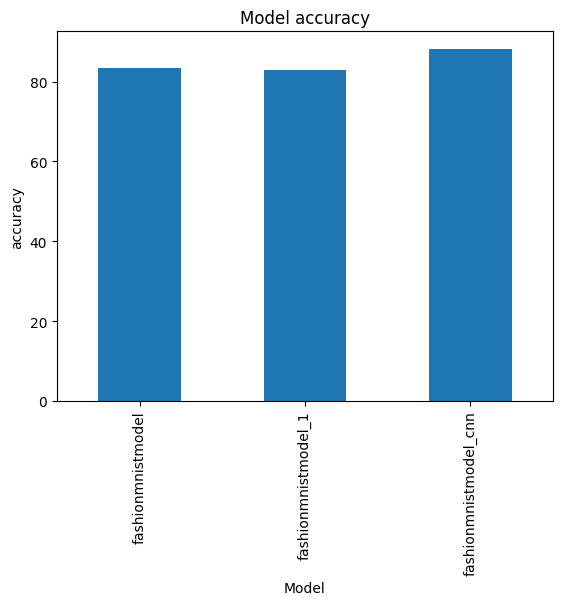

In [ ]:
compare_results.set_index('model_name')['model_acc'].plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Model accuracy')



In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_sample = []
test_label = []
for sample,label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_label.append(label)

test_sample[0].shape

torch.Size([1, 28, 28])

In [ ]:
pred_probs= make_predictions(model=model_1,
                             data=test_sample)



In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 9, 4, 3, 0, 4, 7, 1])

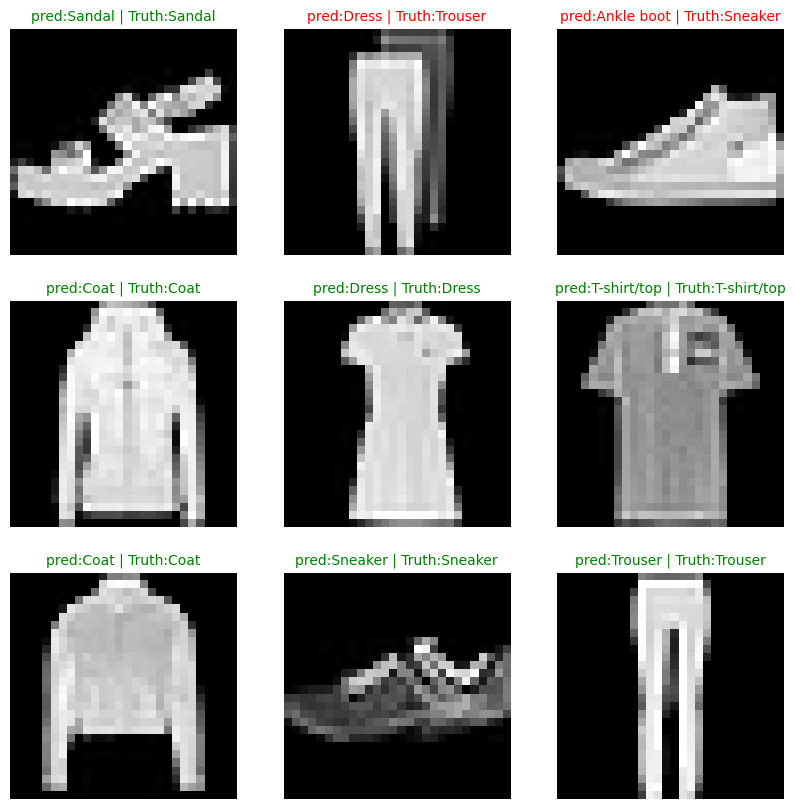

In [ ]:
plt.figure(figsize=(10,10))
rows = 3
cols = 3
for i ,sample in  enumerate(test_sample):
  plt.subplot(rows,cols,i+1)

  plt.imshow(sample.squeeze(),cmap='grey')

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_label[i]]

  title_text  = f"pred:{pred_label} | Truth:{truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,color='green')
  else:
    plt.title(title_text,fontsize=10,color='red')

  plt.axis(False)


In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_cnn.eval()
with torch.inference_mode():
    for X, y in tqdm(test_data_loader, desc="Making predictions"):

        X, y = X.to(device), y.to(device)

        y_logit = model_cnn(X)

        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


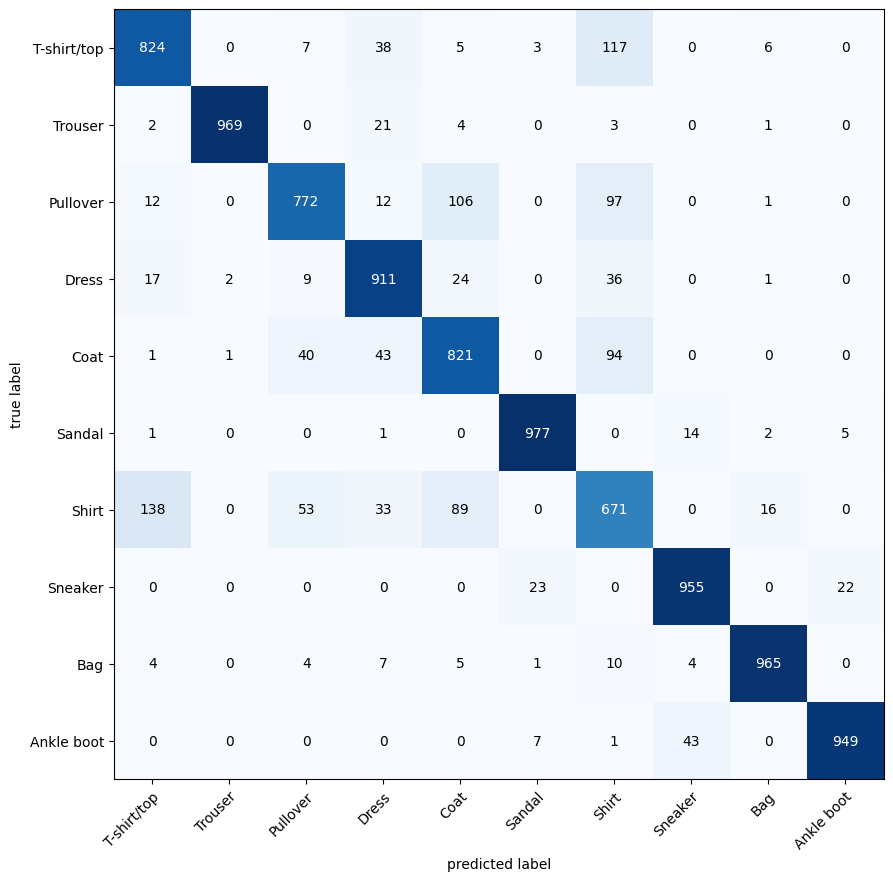

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')

confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

fig ,ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,10)
)

In [ ]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True,exist_ok=True) # Changed line: removed .path

model_name = 'model_CNN.pth'
model_save_path = model_path/model_name
model_save_path

PosixPath('models/model_CNN.pth')

In [ ]:
torch.save(obj=model_cnn.state_dict(),f=model_save_path)

In [ ]:
torch.manual_seed(42)

loaded_model_2 = fashionmnistmodel_cnn(input_shape=1,
                                       hidden_units=10,
                                       output_shape=len(class_names)).to(device)

loaded_model_2.load_state_dict(torch.load(f=model_save_path))

loaded_model_2 = loaded_model_2.to(device)

<ipython-input-89-a485add01a1d>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=model_save_path))


In [ ]:
torch.manual_seed(42)

loaded_models_2 = eval_model(
    model=loaded_model_2,
    data_loader=test_data_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_models_2

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'fashionmnistmodel_cnn',
 'model_loss': 0.326566219329834,
 'model_acc': 88.14896166134186}

In [ ]:
model_cnn_results

{'model_name': 'fashionmnistmodel_cnn',
 'model_loss': 0.326566219329834,
 'model_acc': 88.14896166134186}

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_cnn_results["model_loss"]),
              torch.tensor(loaded_models_2["model_loss"]), # Changed from loaded_model_2 to loaded_models_2
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)